In [4]:
from generate_lib import *

In [109]:
SHOW_PLOT = True
SAVE_PLOT = True

In [107]:
def get_col(head, header):
    return header.index(head)

def plot_data():
    filepath = os.path.join(os.pardir, 'results', 'avg_prob_values', 'avg_prob_values.csv')

    (header, data) = csv_2_data(filepath)

    aligned_data = list()
    random_data = list()
    multiplicities = list()
    xlabels = list()

    for head in header:
        if '(Aligned Omega)' in head:
            n = head.split(' ')[0]
            multiplicities.append(int(n))
            xlabels.append(n + ' Planets')

            aligned_data.append(data[get_col(head, header)])
        elif '(Random Omega)' in head:
            random_data.append(data[get_col(head, header)])

    aligned_data = np.array(aligned_data).astype(float)
    random_data = np.array(aligned_data).astype(float)

    NUM_TICKS = 10

    (fig, axes) = plt.subplots(2, 2, sharex = True, sharey = False)
    fig.set_size_inches(8.0, 8.0)

    xmin = multiplicities[0]

    assert xmin == np.min(multiplicities)

    xloc = np.arange(len(multiplicities)) + xmin

    plot_types = ['linear', 'log']

    for plot_type in plot_types:
        offset = plot_types.index(plot_type) * 2
        
        plt.subplot(2, 2, 1 + offset)

        # Adds the labels.
        if plot_type == 'log':
            plt.plot([], [], color='red', label = 'Aligned Omega')
            plt.plot([], [], color='blue', label = 'Random Omega')
            plt.plot([], [], color=(0.2, 0.2, 0.2), label = 'Mean', linestyle = 'dashed')
            
        for idx in range(len(xloc)):
            y = np.log10(aligned_data[idx]) if plot_type == 'log' else aligned_data[idx]              

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(y, xlow, xhigh, color = (1, 0, 0, 0.006))
            
            avg = np.mean(y)

            plt.hlines(avg, xlow, xhigh, color = (0.5, 0, 0), linestyles = 'dashed')

        plt.subplot(2, 2, 2 + offset)

        for idx in range(len(xloc)):
            ry = np.log10(random_data[idx]) if plot_type == 'log' else random_data[idx]

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(ry, xlow, xhigh, color = (0, 0, 1, 0.006))
            
            avg = np.mean(ry)

            plt.hlines(avg, xlow, xhigh, color = (0, 0, 0.5), linestyles = 'dashed')

    for row in range(len(axes)):
        for col in range(len(axes[row])):
            ax = axes[row][col]
            ax.yaxis.set_major_locator(tck.LinearLocator(NUM_TICKS + 2))
            ax.grid(True, axis = 'y', alpha = 0.5)

            if col == 0:
                ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: ('%.3f' % x) if pos != 0 and pos != NUM_TICKS + 1 else ''))

                if row == 0:
                    ax.set_ylabel('Transit Probability')
                else:
                    ax.set_ylabel('$\log_{10}($Transit Probability$)$')
            else:
                ax.tick_params(axis='y', bottom = False, top = False, length = 0)
                
                ax.yaxis.set_major_formatter(tck.NullFormatter())

            ax.set_xticks(xloc, xlabels, rotation=45)

    fig.legend(bbox_to_anchor = (0.905, 0.885))
    plt.subplots_adjust(wspace = 0.0, hspace = 0.0)
    plt.suptitle('Average Transit Probabilities Over Time by Multiplicity', y = 0.92)

    if SHOW_PLOT:
        plt.show()

    if SAVE_PLOT:
        savepath = os.path.join(os.pardir, 'results', 'avg_prob_values', 'avg_prob_values_by_mult')
        fig.savefig(savepath, dpi = 300, bbox_inches = 'tight')

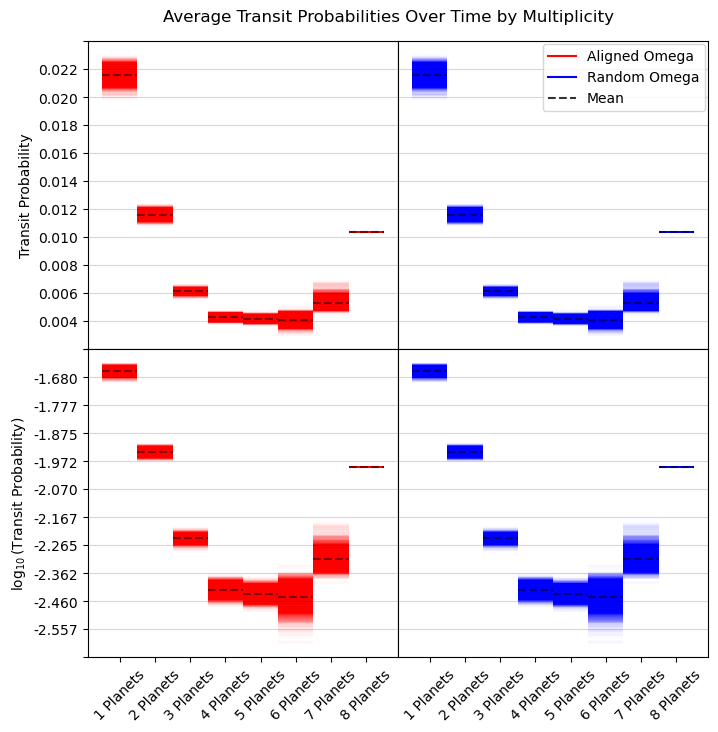

In [108]:
plot_data()